# Average Coders

### Analyze and Visualize

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the Main Dataframe that was produced in the earlier Jupyter Notebook
main_df_filename = "main_dataframe.csv"
main_df = pd.read_csv (main_df_filename)
print(f'The number of rows of data for the clean main dataframe is now {len(main_df.index)}')
main_df.head()

The number of rows of data for the clean main dataframe is now 336


,date,st_interest,it_interest,lt_interest,cpi_index,pct_chg_cpi,oil_price,pct_chg_oil_price,mtg_purchase,mtg_refi,pct_chg_mtg_purchase,pct_cht_mtg_refi,employment,pct_chg_employment,avg_earnings,pct_chg_avg_earnings
0,1991-01-01,6.41,7.13,8.09,134.7,5.65,25.23,10.37,25.0,11.0,-21.28,45.45,109056,-0.13,10.38,3.59
1,1991-02-01,6.12,6.87,7.85,134.8,5.31,20.48,-7.37,25.0,11.0,-21.28,45.45,108735,-0.64,10.39,3.18
2,1991-03-01,6.09,7.10,8.11,134.8,4.82,19.90,-2.40,25.0,11.0,-21.28,45.45,108576,-0.97,10.41,2.97
3,1991-04-01,5.83,6.95,8.04,135.1,4.81,20.83,13.02,33.0,12.0,-6.54,118.75,108367,-1.20,10.46,3.36
4,1991-05-01,5.63,6.78,8.07,135.6,5.03,21.23,16.65,33.0,12.0,-6.54,118.75,108251,-1.45,10.49,3.25


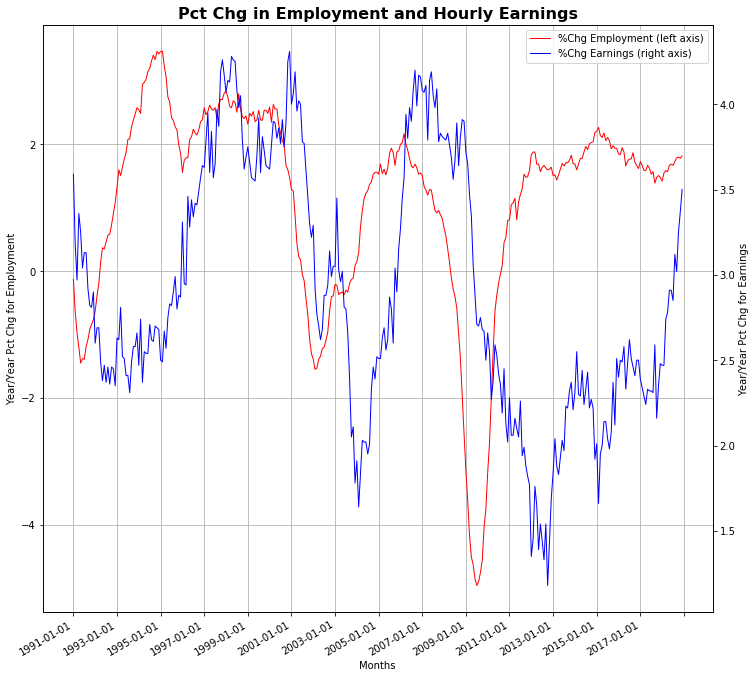

In [3]:
# Graph the percent change in employment and percent change in hourly earnings

# Set the size of the graph
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()

# Give it a title, and labels for the axes
ax1.set_title("Pct Chg in Employment and Hourly Earnings", size=16, weight="bold")
ax1.set_xlabel("Months")
ax1.set_ylabel("Year/Year Pct Chg for Employment")
ax2.set_ylabel("Year/Year Pct Chg for Earnings")

# Create a list of marker types.  I couldn't figure out how to have "plt" show a default marker
# so I created this list of 15 marker types.
marker_type = ['o','v','^','<','>','s','p','*','h','H','1','2','3','4','+']

# Draw the lines
line1 = ax1.plot(main_df["date"], main_df["pct_chg_employment"], color="Red", linewidth=1, label='%Chg Employment (left axis)')
line2 = ax2.plot(main_df["date"], main_df["pct_chg_avg_earnings"], color="Blue", linewidth=1, label='%Chg Earnings (right axis)')

# Create the legend in ax1 for all lines in the figure
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="best")

# Set the tick marks on the x-axis, every 2 years, show only the year, and make it pretty
plt.xticks(np.arange(0, len(main_df["date"])+24, 24))
# monthyearFmt = mdates.DateFormatter('%Y')
# ax1.xaxis.set_major_formatter(monthyearFmt)
fig.autofmt_xdate()

# Add a grid, based off the left-side y-axis
ax1.grid()

# Save the Figure
plt.savefig ('Output/graph1.png')

# Show the Figure
plt.show()

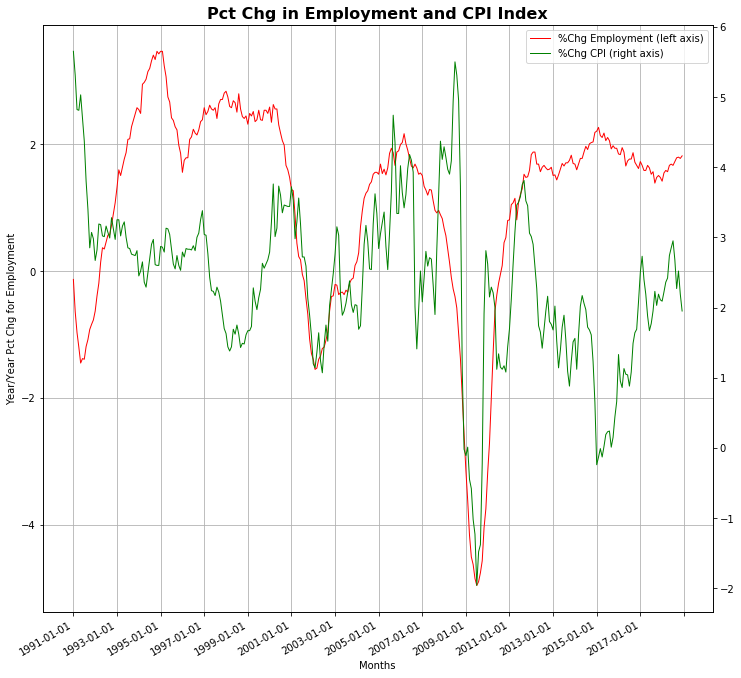

In [4]:
# Graph the percent change in employment and percent change in hourly earnings

# Set the size of the graph
fig, ax1 = plt.subplots(figsize=(12,12))
ax3 = ax1.twinx()

# Give it a title, and labels for the axes
ax1.set_title("Pct Chg in Employment and CPI Index", size=16, weight="bold")
ax1.set_xlabel("Months")
ax1.set_ylabel("Year/Year Pct Chg for Employment")
ax2.set_ylabel("Year/Pct Change CPI")

# so I created this list of 15 marker types.
marker_type = ['o','v','^','<','>','s','p','*','h','H','1','2','3','4','+']

# Draw the lines
line1 = ax1.plot(main_df["date"], main_df["pct_chg_employment"], color="Red", linewidth=1, label='%Chg Employment (left axis)')
line3 = ax3.plot(main_df["date"], main_df["pct_chg_cpi"], color="Green", linewidth=1, label='%Chg CPI (right axis)')

# Create the legend in ax1 for all lines in the figure
lines = line1 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="best")

# Set the tick marks on the x-axis, every 2 years, show only the year, and make it pretty
plt.xticks(np.arange(0, len(main_df["date"])+24, 24))
# monthyearFmt = mdates.DateFormatter('%Y')
# ax1.xaxis.set_major_formatter(monthyearFmt)
fig.autofmt_xdate()

# Add a grid, based off the left-side y-axis
ax1.grid()

# Save the Figure
plt.savefig ('Output/graph2.png')

# Show the Figure
plt.show()

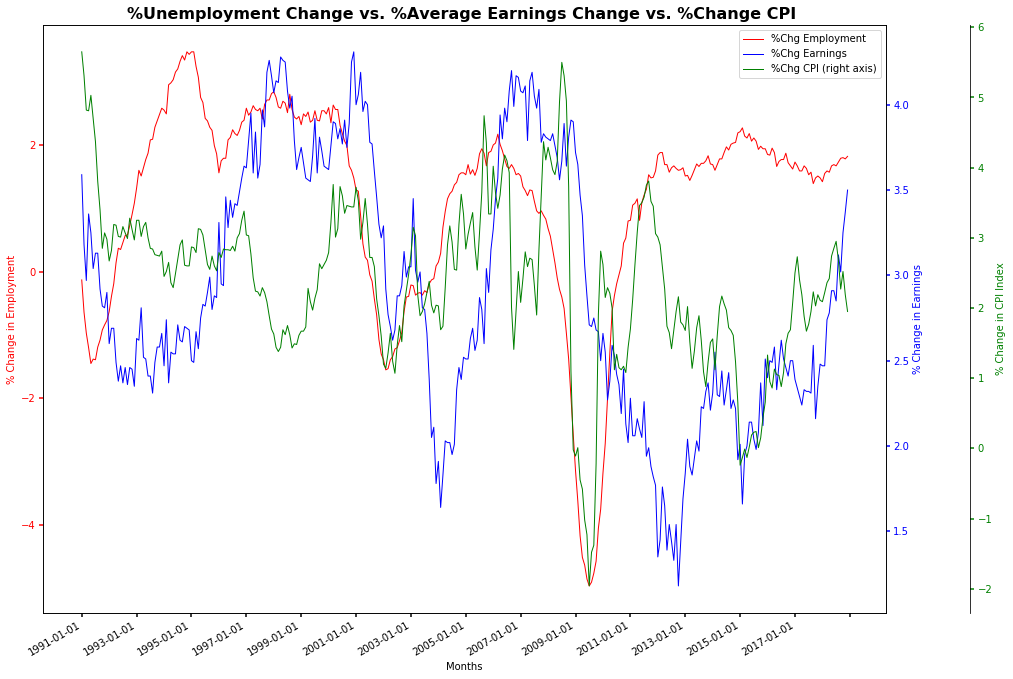

In [12]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (12,12))
fig.subplots_adjust(right=1.1)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(main_df["date"], main_df["pct_chg_employment"], color="Red", linewidth=1, label='%Chg Employment')
p2, = par1.plot(main_df["date"], main_df["pct_chg_avg_earnings"], color="Blue", linewidth=1, label='%Chg Earnings')
p3, = par2.plot(main_df["date"], main_df["pct_chg_cpi"], color="Green", linewidth=1, label='%Chg CPI (right axis)')

host.set_title("%Unemployment Change vs. %Average Earnings Change vs. %Change CPI ", size=16, weight="bold")
host.set_xlabel("Months")
host.set_ylabel("% Change in Employment")
par1.set_ylabel("% Change in Earnings")
par2.set_ylabel("% Change in CPI Index")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

plt.xticks(np.arange(0, len(main_df["date"])+24, 24))

fig.autofmt_xdate()

host.legend(lines, [l.get_label() for l in lines])

plt.show()

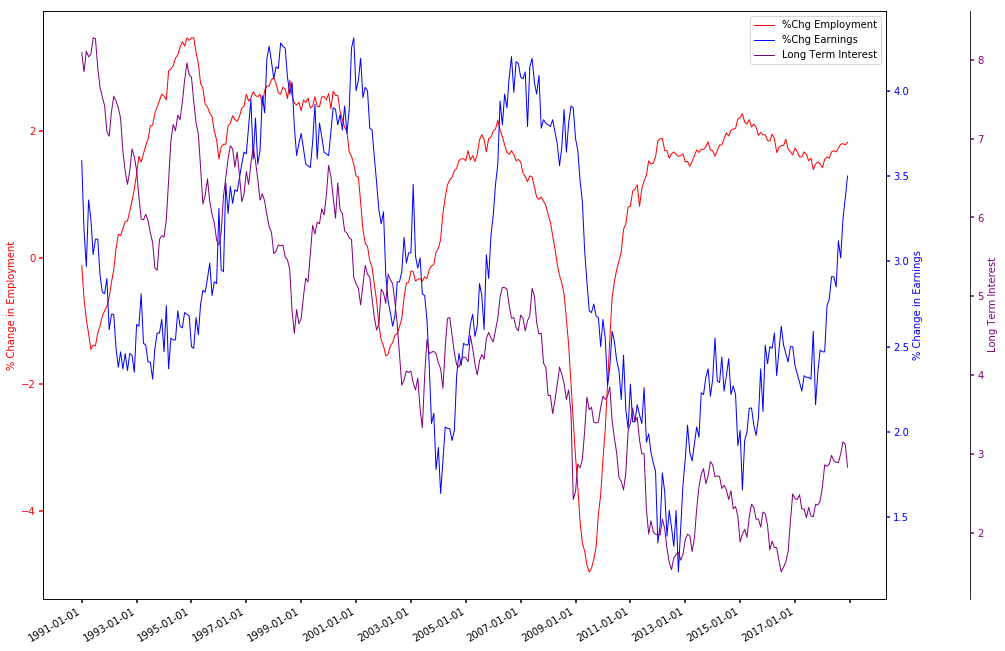

In [11]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (12,12))
fig.subplots_adjust(right=1.1)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(main_df["date"], main_df["pct_chg_employment"], color="Red", linewidth=1, label='%Chg Employment')
p2, = par1.plot(main_df["date"], main_df["pct_chg_avg_earnings"], color="Blue", linewidth=1, label='%Chg Earnings')
p3, = par2.plot(main_df["date"], main_df["lt_interest"], color="Orange", linewidth=1, label='Long Term Interest')


host.set_title("%Unemployment Change vs. %Average Earnings Change vs. Long Term Interest", size=16, weight="bold")
host.set_xlabel("Months")
host.set_ylabel("% Change in Employment")
par1.set_ylabel("% Change in Earnings")
par2.set_ylabel("Long Term Interest")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

plt.xticks(np.arange(0, len(main_df["date"])+24, 24))

fig.autofmt_xdate()

host.legend(lines, [l.get_label() for l in lines])

plt.show()